Oasis Infobyte

Data Science Internship

Task 3 = Car Price Prediction

In [64]:
#IMPORTING ALL THE NECESSARY LIBRARIES

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Calling the data in the notebook
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Statistical Analysis of data
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible 

In [5]:
#Finding if there is any null value present
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Visualizing the data

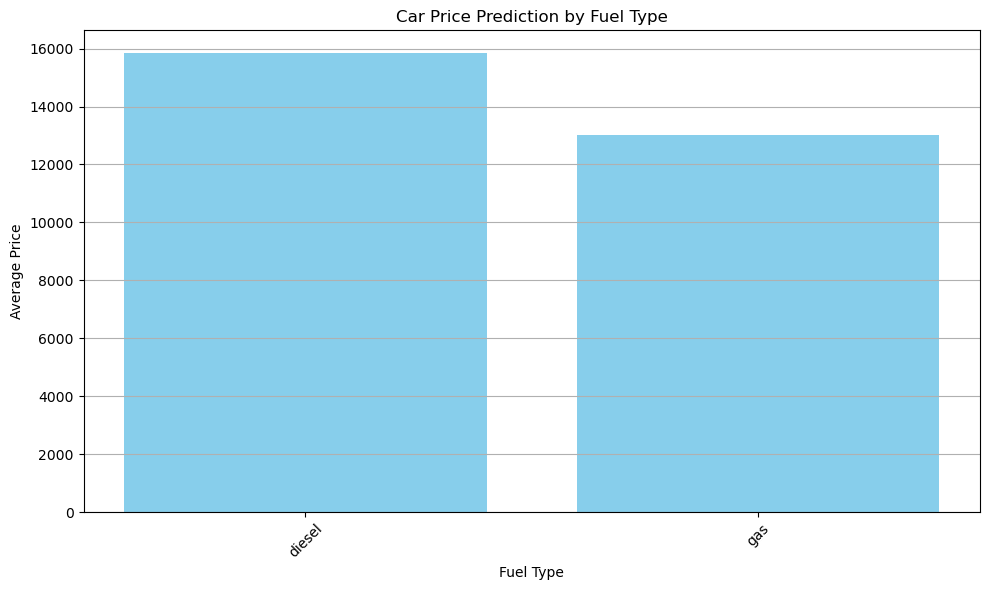

In [6]:
# Group the data by 'fueltype' and calculate the mean price for each fuel type
fuel_price_means = df.groupby('fueltype')['price'].mean()

# Extract the fuel types and their corresponding prices
fuel_types = fuel_price_means.index
average_prices = fuel_price_means.values

# Plotting the bar graph
plt.figure(figsize=(10, 6))  #set the figure size
plt.bar(fuel_types, average_prices, color='skyblue')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Car Price Prediction by Fuel Type')
plt.grid(True, axis='y')  # add grid lines to the y-axis
plt.xticks(rotation=45)   # rotate x-axis labels for better readability
plt.tight_layout()        # to ensure labels fit within the figure

plt.show()


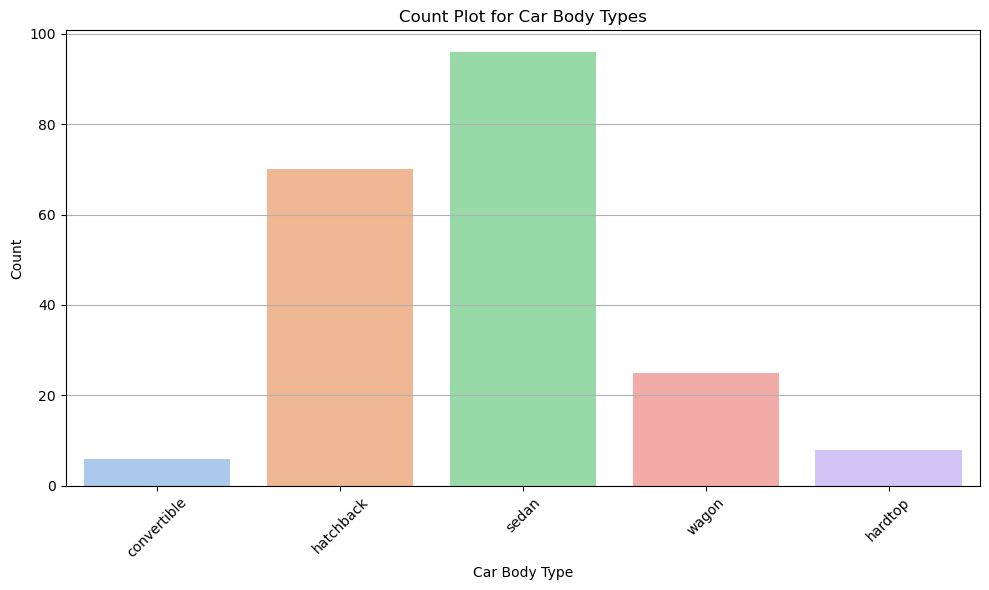

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the count plot using seaborn
plt.figure(figsize=(10, 6))  # set the figure size
sns.countplot(data=df, x='carbody', palette='pastel')
plt.xlabel('Car Body Type')
plt.ylabel('Count')
plt.title('Count Plot for Car Body Types')
plt.grid(True, axis='y')  # add grid lines to the y-axis
plt.xticks(rotation=45)   # rotate x-axis labels for better readability
plt.tight_layout()        # to ensure labels fit within the figure

plt.show()


In [13]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [65]:
#unique_values = df['fuelsystem'].unique()
#print(unique_values)

In [25]:
#dropping the columns which are not required
df.drop('symboling',axis=1,inplace=True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Creating Dummy Valiables for columns with non-numeric data

In [27]:
# Create dummy variables
f = pd.get_dummies(df['fueltype'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('fueltype',axis=1,inplace=True)

In [30]:
# Create dummy variables
f = pd.get_dummies(df['aspiration'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('aspiration',axis=1,inplace=True)

In [33]:
# Create dummy variables
f = pd.get_dummies(df['doornumber'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('doornumber',axis=1,inplace=True)

In [36]:
# Create dummy variables
f = pd.get_dummies(df['carbody'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('carbody',axis=1,inplace=True)

In [38]:
# Create dummy variables
f = pd.get_dummies(df['drivewheel'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('drivewheel',axis=1,inplace=True)

In [40]:
# Create dummy variables
f = pd.get_dummies(df['enginelocation'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('enginelocation',axis=1,inplace=True)

In [ ]:
# Create dummy variables
f = pd.get_dummies(df['enginelocation'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('enginelocation',axis=1,inplace=True)

In [42]:
# Create dummy variables
f = pd.get_dummies(df['cylindernumber'],drop_first=True)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df,f],axis=1)

# Drop the original categorical column as we have created dummy variables for it
df.drop('cylindernumber',axis=1,inplace=True)

NEW DataFrame after performing transformation Operations

In [43]:
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,wagon,fwd,rwd,rear,five,four,six,three,twelve,two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,1,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,1,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,1,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,1,0,0,0,0,0


In [51]:
#unique_values = df['peakrpm'].unique()
#print(unique_values)

In [44]:
df.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'gas', 'turbo', 'two',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear', 'five',
       'four', 'six', 'three', 'twelve', 'two'],
      dtype='object')

In [47]:
df.isnull().sum()

wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
gas                 0
turbo               0
two                 0
hardtop             0
hatchback           0
sedan               0
wagon               0
fwd                 0
rwd                 0
rear                0
five                0
four                0
six                 0
three               0
twelve              0
two                 0
dtype: int64

Splitting the data into Independent and Dependent variables(X & y)

In [52]:
X = df.drop('price',axis=1)
X.shape

(205, 29)

In [53]:
y = df['price']
len(y)

205

Splitting the data into train and test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creating Model for predicting the price of cars

In [56]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()

In [57]:
l_model.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = l_model.predict(X_test)
y_pred

array([25416.89408955, 19156.00628275, 10552.96393641, 11519.04108999,
       26367.16959827,  5973.64249849,  7256.51970143,  7488.46593757,
        7903.80763899,  8645.58870183, 17637.16032178,  7014.91988726,
       16143.80393576,  9198.35063981, 46908.07973646,  6485.775818  ,
        1903.62704264, 13604.75175521,  9969.95877664,  9724.45599433,
       10955.33315213, 20096.81770635,  4514.56114524,  3205.20218339,
        7306.22109064, 24948.02479154, 11928.14484334, 15826.49396898,
        5186.50827604, 17431.95095265, 27757.37477273,  6367.9227019 ,
        7345.67033694, 23400.41733583,  7928.27173083, 24057.79567042,
       12551.68452233, 13056.22973395,  6968.80005153, 13595.85968763,
        6588.14737757])

In [63]:
r2 = r2_score(y_test, y_pred)
r2

0.8324532601078238

Model predicted the price of the car with accuracy of 0.83